In [1]:
import os
imdb_dir = 'data\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
            

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

Using TensorFlow backend.


In [5]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

In [6]:
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f'{np.array(sequences).shape}')
print(f'Found {len(word_index)} unique tokens.')

(12500,)
Found 64421 unique tokens.


In [ ]:
index_docs = tokenizer.index_docs

In [28]:
index_word = tokenizer.index_word
# list(index_word.items())[:10]

In [35]:
texts[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [37]:
from guang.Utils.distance import distance

In [38]:
from guang.Utils.toolsFunc import probar

In [42]:
theText = []
for i in sequences[0]:
    theText.append(index_word[i])
print(' '.join(theText))

high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead me to believe that satire is much closer to reality than is teachers the to survive financially the insightful students who can see right through their pathetic the of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately at high a classic line inspector i'm here to one of your teachers student welcome to high i expect that many adults of my age think that high is far fetched what a pity that it isn't


In [40]:
for idx, i in probar(texts):
    if distance(' '.join(theText), i) > 0.7:
        print(idx, i)

0.00% 	  0.0|infs 	0 Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
100.00% 	0'30.3"|0'30.3"	Expect:12-19 20:36:31 	

In [ ]:
# 好的， 是一样的，只是名字不在。

In [47]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels) # label是正负评论，正是1，负是0
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (12500, 100)
Shape of label tensor: (12500,)


In [48]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # 取200 个作为训练集样本
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [52]:
np.array(x_train).shape

(200, 100)

In [49]:
glove_dir = r'D:\baidu_upload\glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [53]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

```python
embedding_matrix:
    是一个将max_words维的数据嵌入到embedding_dim维度中去的一个矩阵
```

In [65]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


In [62]:
x_train[0].shape

(100,)

In [99]:
model = Sequential()
model.add(Embedding(1000, 4, input_length=10)) # 如果这里不指定input_length, 则输入序列可以是任意长度
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(2, 20))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)

In [100]:
input_array

array([[959, 106, 833, 668, 959, 886, 962, 529, 350, 426, 617, 981, 159,
        162, 562, 988, 213, 402, 434, 850],
       [319, 570,  99, 507, 479, 145, 330, 829, 625, 669, 977, 320, 136,
        112, 949, 373, 951, 425, 525, 112]])

In [90]:
output_array.shape

(2, 10, 4)

In [91]:
output_array[0]

array([[ 0.00786114, -0.01698194,  0.0150683 ,  0.03983139],
       [ 0.03373535,  0.02346637,  0.0497103 ,  0.04822059],
       [-0.03029265,  0.01540561,  0.01532428, -0.0207474 ],
       [-0.0271569 , -0.0117485 , -0.02985997, -0.02287605],
       [ 0.02205714,  0.03082046,  0.03712045, -0.02683493],
       [-0.01886402,  0.04922568, -0.03825454,  0.02208486],
       [ 0.03674922, -0.00583619, -0.02431835,  0.01926732],
       [ 0.00974752,  0.03625659,  0.04477045, -0.0210044 ],
       [-0.02464417,  0.03700198, -0.04864953,  0.01777674],
       [ 0.02205714,  0.03082046,  0.03712045, -0.02683493]],
      dtype=float32)

In [93]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [95]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(x_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 12ms/step - loss: 0.1098 - acc: 0.9400 - val_loss: 1.1576e-04 - val_acc: 1.0000
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 1.4513e-04 - acc: 1.0000 - val_loss: 1.1341e-04 - val_acc: 1.0000
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 1.2578e-04 - acc: 1.0000 - val_loss: 1.1056e-04 - val_acc: 1.0000
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0604e-04 - acc: 1.0000 - val_loss: 1.0721e-04 - val_acc: 1.0000
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 8.8002e-05 - acc: 1.0000 - val_loss: 9.6435e-05 - val_acc: 1.0000
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 4.7595e-05 - acc: 1.0000 - val_loss: 9.3520e-05 - val_acc: 1.0000
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 4.1352e-05 - acc: 1.0000 - val_loss: 9.02

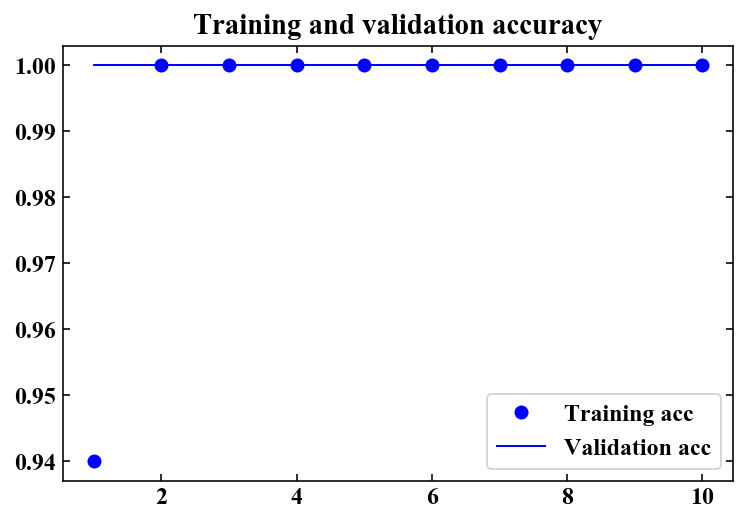

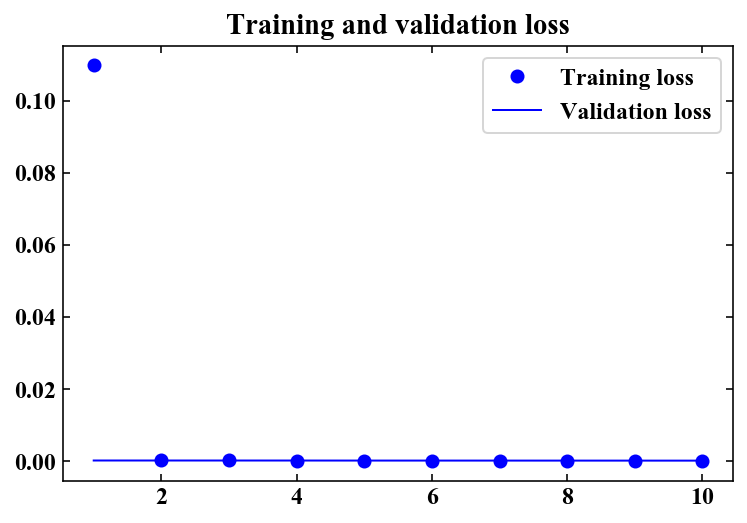

In [96]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()